In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys 
import matplotlib.colors as mc
sys.path.append("../") 

# Importing the functions from src
from src.eda_plotting import correlation_heatmap, swarm_grid, distribution_grid, boxplot_grid, regplot_grid

from IPython import get_ipython
get_ipython().run_line_magic("load_ext", "autoreload")
get_ipython().run_line_magic("autoreload", "2")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv('../data/raw/candy-data.csv')
print(data.info())
data.head()

<class 'pandas.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     str    
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), str(1)
memory usage: 8.8 KB
None


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
# Rename the columns of DATA for convenience
NewNames = ["CandyName", "Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer",
            "Hard", "Bar", "PluriBus", "SugarPercent", "PricePercent", "WinPercent"]

data.rename(columns=dict(zip(data.columns,NewNames)), inplace=True)
data.describe()

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,WinPercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [5]:
# Check if data is complete and has no missing values
foo = data.isnull().sum()
if (foo.sum() == 0):
    print("PASS CHECK!")
else:
    print(foo)

PASS CHECK!


Since the dataset is complete (has no missing values), and has no apparent anomalies, no specific pre-processing tasks are required.

In [6]:
# Categorize the variables
Target          = "WinPercent"
FlavorFeats     = ["Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer"]
FormFeats       = ["Hard", "Bar", "PluriBus"]
ContinuousFeats = ["SugarPercent", "PricePercent"]
Features        = FlavorFeats + FormFeats + ContinuousFeats

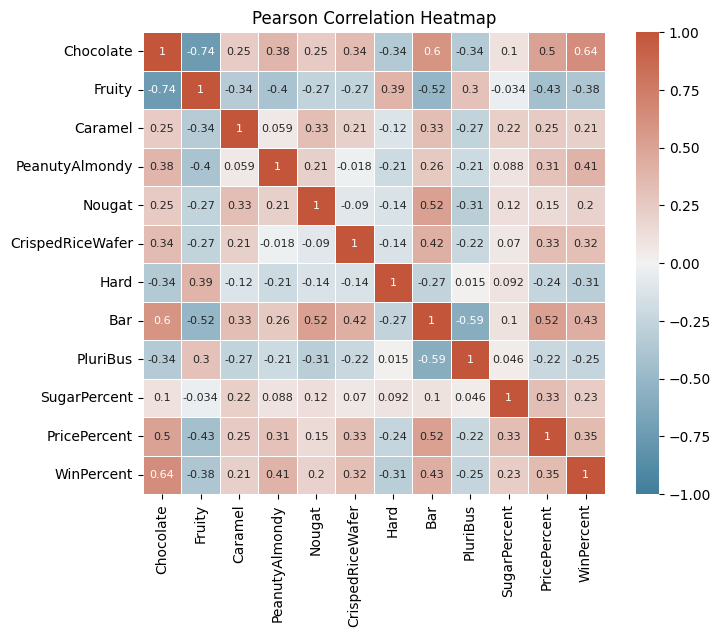

In [7]:
correlation_heatmap(data, Features + [Target], "Pearson Correlation Heatmap")

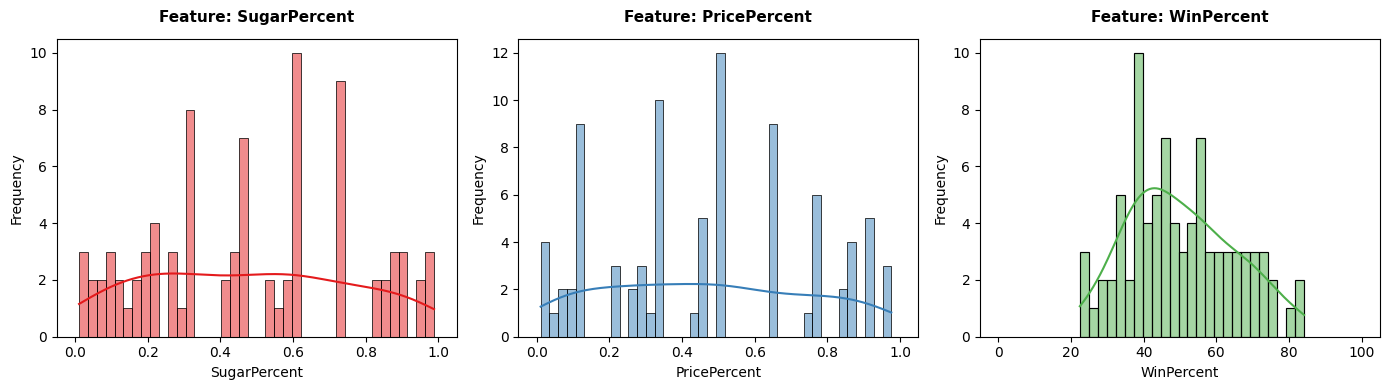

In [19]:
numeric_cols = ContinuousFeats + [Target]
palette = sns.color_palette("Set1", n_colors=len(numeric_cols))
colors_dict = {
    col: palette[i]
    for i, col in enumerate(numeric_cols)
}
bin_dict = {
    "SugarPercent": 40,
    "PricePercent": 40,
    "WinPercent": 25
}
limits = {"SugarPercent":[-0.05,1.05], "PricePercent":[-0.05,1.05], "WinPercent":[-5,105]}
distribution_grid(data, numeric_cols, colors_dict, bin_dict, limits_dict=limits)

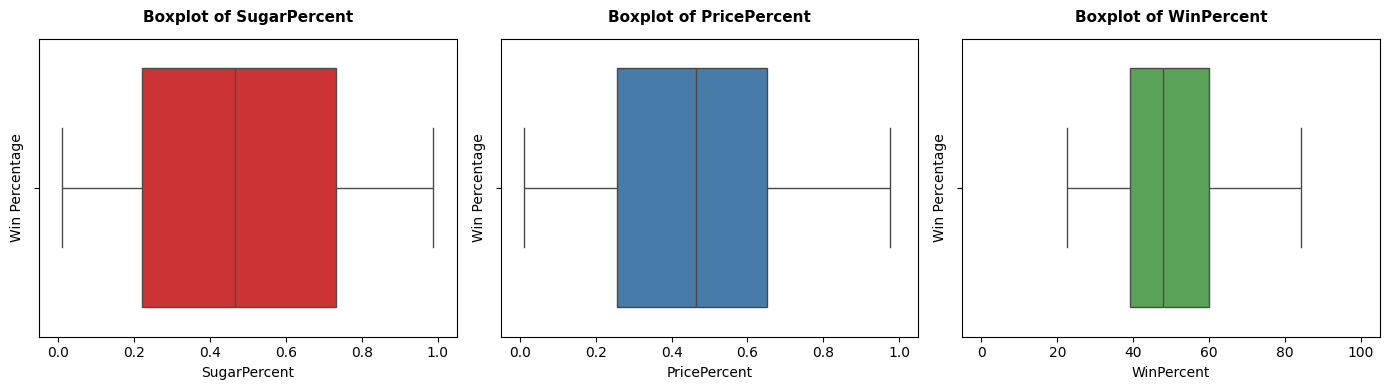

In [20]:
boxplot_grid(data, numeric_cols, colors_dict, limits_dict=limits)

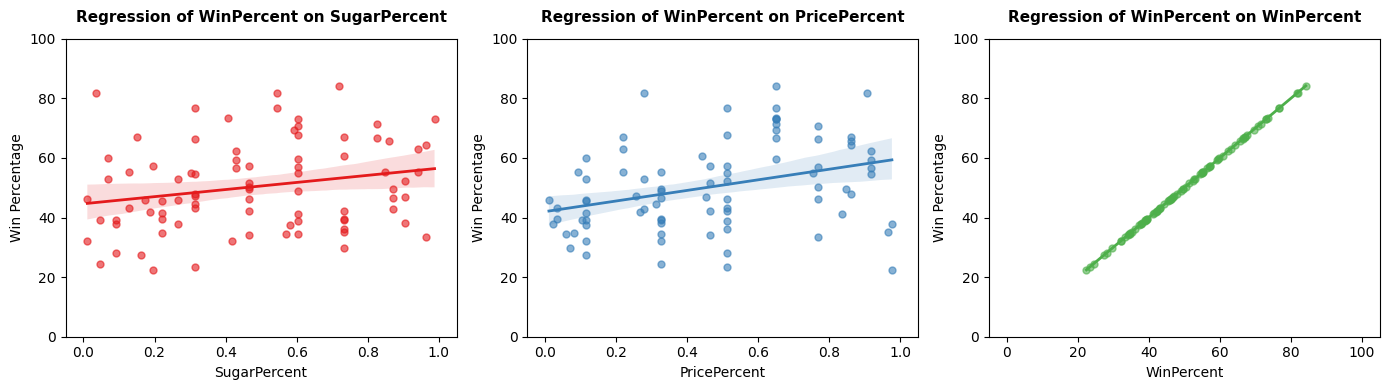

In [23]:
regplot_grid(data, numeric_cols, Target, colors_dict, x_limits_dict=limits, y_limits_dict={"SugarPercent":[0, 100], "PricePercent":[0, 100], "WinPercent":[0, 100]})

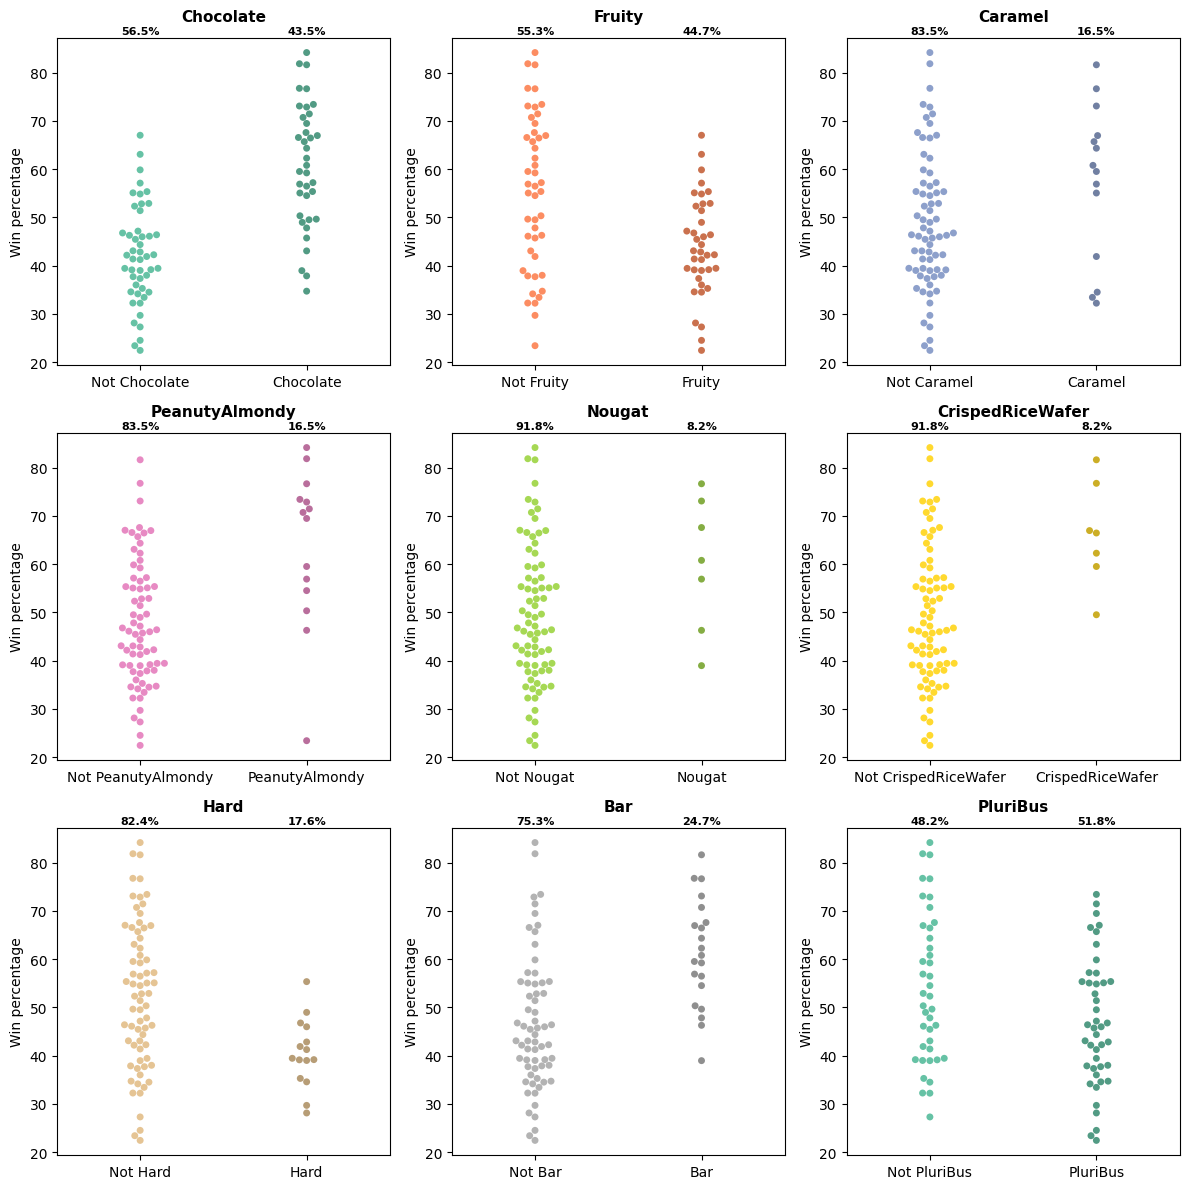

In [15]:
binary_columns = FlavorFeats + FormFeats

labels_dict = {
    col: [f"Not {col}", col] 
    for col in binary_columns
}
palette = sns.color_palette("Set2", n_colors=len(binary_columns))
def darken(color, amount=0.8): 
    r, g, b = color
    return (r * amount, g * amount, b * amount)

colors_dict = {
    col: [palette[i], darken(palette[i])]  # same palette but two shades
    for i, col in enumerate(binary_columns)
}

swarm_grid(data, binary_columns, Target, labels_dict, colors_dict, max_cols=3, figsize=(12, 4))
